<a href="https://colab.research.google.com/github/llpk79/DS-Unit-2-Regression-1/blob/master/Paul_K_doing_even_more_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mae
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt

columns = ['Year','Incumbent','Other','Incumbent Votes']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

columns = ['Year','Income growth']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

columns = ['Year','Fatalities']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

df = votes.merge(growth).merge(deaths)
df.head()

,Year,Incumbent,Other,Incumbent Votes,Income growth,Fatalities
0,1952,Stevenson,Eisenhower,44.60,2.40,190
1,1956,Eisenhower,Stevenson,57.76,2.89,0
2,1960,Nixon,Kennedy,49.91,0.85,0
3,1964,Johnson,Goldwater,61.34,4.21,1
4,1968,Humphrey,Nixon,49.60,3.02,146


In [2]:
from google.colab import files
files.upload()

Saving CPIAUCSL.csv to CPIAUCSL.csv


{'CPIAUCSL.csv': b'DATE,CPIAUCSL\n1952-01-01,26.45\n1952-02-01,26.41\n1952-03-01,26.39\n1952-04-01,26.46\n1952-05-01,26.47\n1952-06-01,26.53\n1952-07-01,26.68\n1952-08-01,26.69\n1952-09-01,26.63\n1952-10-01,26.69\n1952-11-01,26.69\n1952-12-01,26.71\n1953-01-01,26.64\n1953-02-01,26.59\n1953-03-01,26.63\n1953-04-01,26.69\n1953-05-01,26.7\n1953-06-01,26.77\n1953-07-01,26.79\n1953-08-01,26.85\n1953-09-01,26.89\n1953-10-01,26.95\n1953-11-01,26.85\n1953-12-01,26.87\n1954-01-01,26.94\n1954-02-01,26.99\n1954-03-01,26.93\n1954-04-01,26.86\n1954-05-01,26.93\n1954-06-01,26.94\n1954-07-01,26.86\n1954-08-01,26.85\n1954-09-01,26.81\n1954-10-01,26.72\n1954-11-01,26.78\n1954-12-01,26.77\n1955-01-01,26.77\n1955-02-01,26.82\n1955-03-01,26.79\n1955-04-01,26.79\n1955-05-01,26.77\n1955-06-01,26.71\n1955-07-01,26.76\n1955-08-01,26.72\n1955-09-01,26.85\n1955-10-01,26.82\n1955-11-01,26.88\n1955-12-01,26.87\n1956-01-01,26.83\n1956-02-01,26.86\n1956-03-01,26.89\n1956-04-01,26.93\n1956-05-01,27.03\n1956-06-01,27

In [3]:
price_index = pd.read_csv('CPIAUCSL.csv')
price_index.head()

,DATE,CPIAUCSL
0,1952-01-01,26.45
1,1952-02-01,26.41
2,1952-03-01,26.39
3,1952-04-01,26.46
4,1952-05-01,26.47


In [4]:
prices = []
for year in df['Year']:
  time = str(year) + '-01-01'
  prices.append(price_index[price_index['DATE'] == time]['CPIAUCSL'].values[0])
prices

[26.45,
 26.83,
 29.37,
 30.94,
 34.1,
 41.2,
 55.8,
 78.0,
 102.1,
 116.0,
 138.3,
 154.7,
 169.3,
 186.3,
 212.174,
 227.842,
 237.833]

In [0]:
df['price index'] = prices

In [6]:
df.head()

,Year,Incumbent,Other,Incumbent Votes,Income growth,Fatalities,price index
0,1952,Stevenson,Eisenhower,44.60,2.40,190,26.45
1,1956,Eisenhower,Stevenson,57.76,2.89,0,26.83
2,1960,Nixon,Kennedy,49.91,0.85,0,29.37
3,1964,Johnson,Goldwater,61.34,4.21,1,30.94
4,1968,Humphrey,Nixon,49.60,3.02,146,34.10


In [0]:
features = ['Income growth', 'price index']
label = 'Incumbent Votes'
train = df.query('Year < 2000')
test = df.query('Year >= 2000')
X_train_0 = train[features]
y_train = train[label]
X_test_0 = test[features]
y_test = test[label]

In [8]:
model_0 = LR()
model_0.fit(X_train_0, y_train)
y_pred_0 = model_0.predict(X_test_0)
error_0 = mae(y_test, y_pred_0)
print(f'MAE for model_0 is {error_0}')
print(f'MSE for model_0 is {mse(y_test, y_pred_0)}')
print(f'RMSE for model_0 is {(mse(y_test, y_pred_0))**0.5}')
print(f'R2 for model_0 is {r2(y_test, y_pred_0)}')


MAE for model_0 is 4.24353361196399
MSE for model_0 is 20.523103454219203
RMSE for model_0 is 4.530243200339161
R2 for model_0 is -3.7470438286241405


In [0]:
# features = ['Fatalities', 'price index']
# X_train_1 = train[features]
# X_test_1 = test[features]
# model_1 = LR()
# model_1.fit(X_train_1, y_train)
# y_pred_1 = model_1.predict(X_test_1)
# error_1 = mae(y_test, y_pred_1)
# print(f'MAE for model_1 is {error_1}')
# print(f'MSE for model_0 is {mse(y_test, y_pred_1)}')
# print(f'RMSE for model_0 is {(mse(y_test, y_pred_1)**0.5)}')
# print(f'R2 for model_0 is {r2(y_test, y_pred_1)}')


In [9]:
y_pred_0

array([57.30357492, 55.57746606, 50.58813805, 54.26295708, 51.51553195])

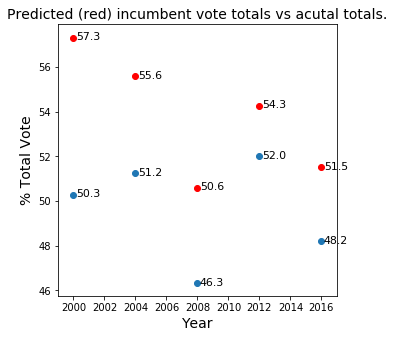

In [10]:
years = [2000, 2004, 2008, 2012, 2016]
data=df.query('Year >= 2000')

fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
ax.scatter('Year', 'Incumbent Votes', data=data)
ax.scatter(x=years, y=y_pred_0, color='red')
ax.set_ylabel('% Total Vote', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_xlim(1999, 2017)
for year, pct, act in zip(years, y_pred_0, data['Incumbent Votes']):
  plt.text(year + .15, pct - .1, s=f'{pct:.1f}', fontsize=11)
  plt.text(year + .15, act - .1, s=f'{act:.1f}', fontsize=11)
plt.title(r"Predicted (red) incumbent vote totals vs acutal totals.", fontsize=14);

In [11]:
inter, coef_1, coef_2 = model_0.intercept_, *model_0.coef_
inter, coef_1, coef_2

(42.55381823863804, 3.6570942343541737, 0.036143025946086794)

In [0]:
def plot_2_feature_regression(model, features, label, train, test):
  feature_1, feature_2 = features
  predicted = model.predict(test[features])
  intercept, coef_1, coef_2 = model.intercept_, *model.coef_

  # Define grid space for plane.
  X1 = np.linspace(train[feature_1].min(), train[feature_1].max(), 5)
  X2 = np.linspace(train[feature_2].min(), train[feature_2].max(), 5)
  X, Y = np.meshgrid(X1, X2)
  
  # Apply model params to linespace values and save in a third matrix.
  Z = np.zeros(X.shape)
  for r in zip(range(X.shape[0])):
      for c in range(X.shape[1]):
          Z[r,c] = coef_1 * X[r,c] + coef_2 * Y[r,c] + intercept

  # Do plotty things.
  fig = plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111, projection='3d')
  
  # Plot points for train set.
  ax.scatter3D(train[feature_1], train[feature_2], train[label], color='b')
  
  # Plot points for test set.
  ax.scatter3D(test[feature_1], test[feature_2], test[label], color='r')
  
  # Plot predictions.
  ax.scatter3D(test[feature_1], test[feature_2], predicted, color='black')
  
  # Draw plane of best fit
  ax.plot_surface(X, Y, Z, color='g', alpha=.25)

  # Project predictions onto plane.
  for x, y, z, label in zip(test[feature_1], test[feature_2], predicted, test[label]):
    
    # I'm fairly certain that coef_1 and coef_2 belong here, not sure of the third param
    # or on deciding what order they go in, but 1/intercept keeps everything in the
    # ballpark.
    best_fit = np.array([coef_1, coef_2, 1/intercept])

    our_vector = np.array([x, y, z])

    vector_scaler = np.dot(our_vector, best_fit) / np.dot(best_fit, best_fit)

    scaled_best_fit = best_fit * vector_scaler
     
    end_points = our_vector - scaled_best_fit
#     print('beep')
#     print(end_points)

    # Plot lines from predicted to true values.
    ax.plot((x, x), (y, y), (z, label), color='gray', linestyle='--')
    # Plot lines from predicted values to somewhere.
    ax.plot((x, end_points[0]), (y, end_points[1]), (z, end_points[2]), color='black', linestyle=':')

  ax.set_xlabel(f'{feature_1}')
  ax.set_ylabel(f'{feature_2}')
  ax.set_zlabel(f'{label}')
  # Set veiwing angle.
  ax.view_init(15, 120)

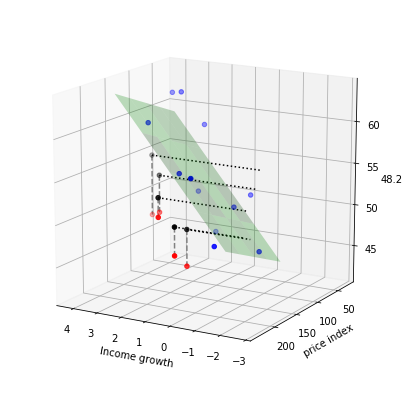

In [39]:
features = ['Income growth', 'price index']

plot_2_feature_regression(model_0, features, label, train, test)